In [78]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [79]:
#### ORDENACION 1,2,3,4 ... de los FOLDERS

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [80]:
#### CARGAMOS LOS FOLDERS DE TRABAJO

r = os.listdir("Simulacion")
Depths = []
for element in r:
    if element.startswith("Depth",):
        Depths.append(element)
        
Diameters = []
for element in r:
    if element.startswith("Diameter",):
        Diameters.append(element)
        
#### GUARDADAS LOS PATHS A LAS FLUENCIAS (STRING)
Depths.sort(key = natural_keys)
Diameters.sort(key = natural_keys)

colors = plt.cm.rainbow(np.linspace(0,1,len(Depths)))

#### GUARDADOS LOS VALORES DE FLUENCIA (FLOAT)
F = []
i = 0
for i,f in enumerate(Fluences):
    F.append(re.findall(r'\d+.\d+', f))
    F[i] = float(F[i][0])
F = np.asarray(F)

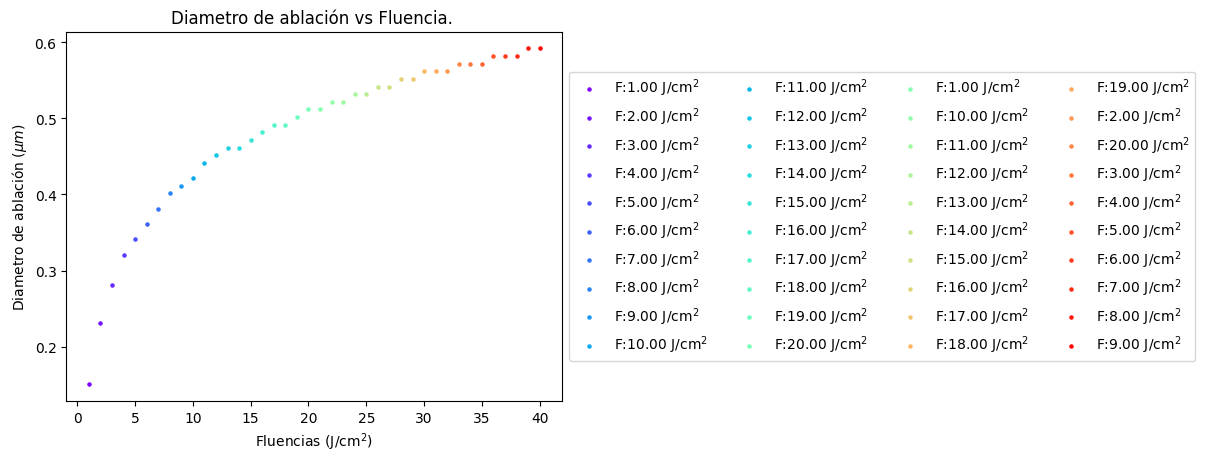

In [85]:
i = 0
one_pulse_depths = []
for depth in Depths:
    Depth = np.load("Simulacion/" + depth)
    one_pulse_depths.append(Depth)
    plt.scatter(i+1,Depth*1e6,color = colors[i],label = f"F:{F[i]:.2f} J/cm$^2$",s=5)
    plt.xlabel("Fluencias (J/cm$^2$)")
    plt.ylabel(fr"Diametro de ablación ($\mu m$)");
    plt.title("Diametro de ablación vs Fluencia. ")
    # print(f"Depth Crater with F:{fluence}: {Diameter[0]*1e6:.4f} um")
    i += 1
    plt.legend(ncol=4,loc='center left', bbox_to_anchor=(1, 0.5))

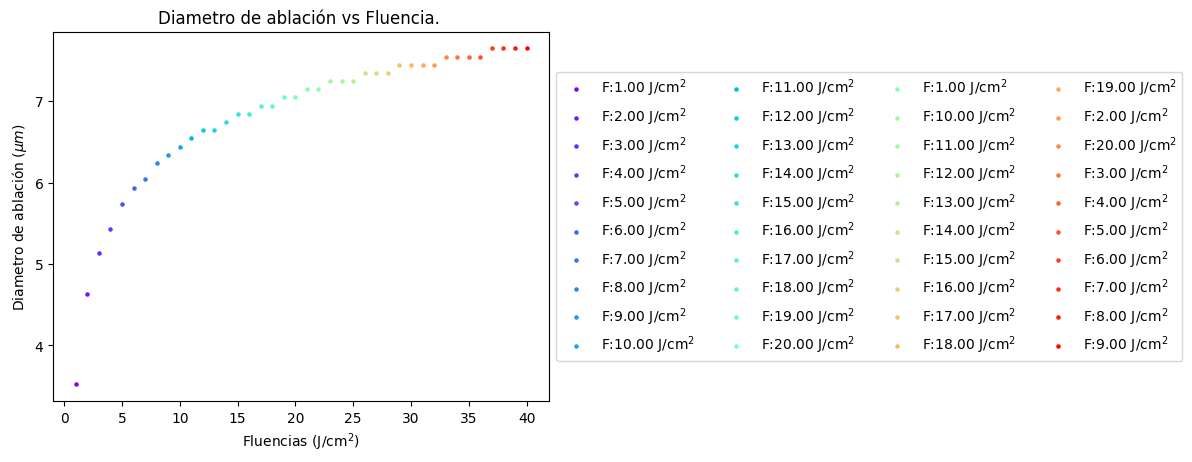

In [83]:
i = 0
one_pulse_diameters = []
for diameter in Diameters:
    Diameter = np.load("Simulacion/" + diameter)
    one_pulse_diameters.append(Diameter)
    plt.scatter(i+1,Diameter*1e6,color = colors[i],label = f"F:{F[i]:.2f} J/cm$^2$",s=5)
    plt.xlabel("Fluencias (J/cm$^2$)")
    plt.ylabel(fr"Diametro de ablación ($\mu m$)");
    plt.title("Diametro de ablación vs Fluencia. ")
    # print(f"Depth Crater with F:{fluence}: {Diameter[0]*1e6:.4f} um")
    i += 1
    plt.legend(ncol=4,loc='center left', bbox_to_anchor=(1, 0.5))
one_pulse_diameters = np.asarray(one_pulse_diameters)

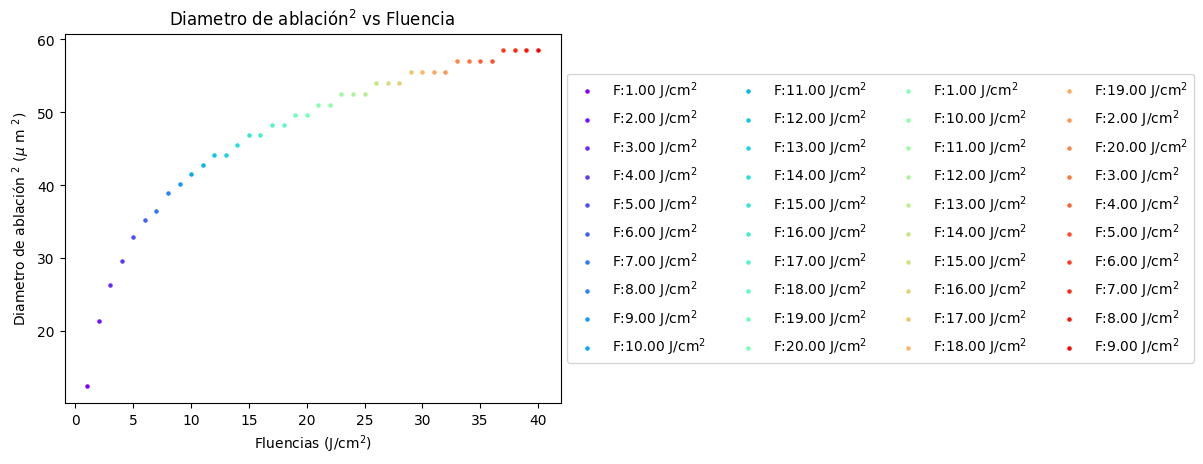

In [84]:
i = 0
for diameter in Diameters:
    Diameter = np.load("Simulacion/" + diameter)
    plt.scatter(i+1,(Diameter*1e6)**2,color = colors[i],label = f"F:{F[i]:.2f} J/cm$^2$",s=5)
    plt.xlabel("Fluencias (J/cm$^2$)")
    plt.ylabel(fr"Diametro de ablación $^2$ ($\mu$ m $^2$)");
    plt.title("Diametro de ablación$^2$ vs Fluencia ")
    # print(f"Depth Crater with F:{fluence}: {Diameter[0]*1e6:.4f} um")
    i += 1
    plt.legend(ncol=4,loc='center left', bbox_to_anchor=(1, 0.5))


In [86]:
np.savetxt("Valores Finales/depths.txt",one_pulse_depths)
np.savetxt("Valores Finales/diameters.txt",one_pulse_diameters)